 # 都道府県間流動量（トラック計）


- 荷主: 商流が上の企業
  - 課題: コスト
- 運び手: 中小の物流企業（トラック数台持ち）
  - 課題: 戻り荷案件がない？？（ここの検証はできてない?）

### インタビューでは「東京への荷物は多いが，東京から他への荷物は少ない」とあったが，それは本当か

### to:東京とfrom:東京の物流量を比較する

**本当だった場合**

例えば 岡山=>東京はめちゃめちゃ多い
東京=>岡山は少ない
状況で，東京=>大阪までの戻り荷に空きがあり，かつ大阪=>岡山の戻り荷の空きがあればいけるのでは

**うそだった場合(誤認識)**

ユーザも気付いていなかっただけで実は，二つの都道府県間の物量は変わらず，うまく最適化すれば戻り荷物もいけた

## 基本データ

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('all_track.tsv', sep='\t',  index_col=0)
df = df.fillna(0)
df = df.astype(int)

In [3]:
df.head()

,北海道,青森,岩手,宮城,秋田,山形,福島,茨城,栃木,群馬,...,愛媛,高知,福岡,佐賀,長崎,熊本,大分,宮崎,鹿児島,沖縄
北海道,602116,2070,263,1787,274,645,371,2969,629,2035,...,49,110,969,82,0,3,0,2,5,0
青森,1185,223794,8268,2661,2846,333,5606,769,384,1046,...,10,0,75,0,68,133,2,116,108,0
岩手,970,5346,217728,29113,2316,1948,1570,1404,1175,750,...,7,1,68,23,0,15,4,10,14,0
宮城,2929,6410,19599,239230,12678,13613,22723,2854,2806,1264,...,3,2,305,3,11,180,10,3,3,1
秋田,833,1311,4331,2475,118773,1289,1127,1002,179,353,...,0,0,18,0,1,7,1,0,1,0


In [4]:
from_tokyo = df['東京':'東京'].T
from_tokyo.columns = ['from_vol']
from_tokyo = from_tokyo.drop('東京')
to_tokyo = pd.DataFrame(df['東京'])
to_tokyo.columns = ['to_vol']
to_tokyo = to_tokyo.drop('東京')

#### 東京出発の物流量統計データ

In [5]:
from_tokyo.describe()

,from_vol
count,46.000000
mean,8396.021739
std,22025.210021
min,21.000000
25%,299.500000
50%,1076.000000
75%,5606.500000
max,135941.000000


#### 東京着の物流量統計データ

In [6]:
to_tokyo.describe()

,to_vol
count,46.000000
mean,12620.934783
std,31015.922889
min,0.000000
25%,825.250000
50%,1966.000000
75%,8053.250000
max,159705.000000


### 東京発上位5県，下位5県
- 上位：関東 + 大阪+愛知
- 下位: 沖縄 + 九州

In [7]:
from_tokyo.sort_values('from_vol', ascending=False).head(10)

,from_vol
埼玉,135941
神奈川,51681
山梨,38532
千葉,34821
大阪,19694
茨城,16467
宮城,11784
栃木,11246
群馬,8490
愛知,8051


In [8]:
from_tokyo.sort_values('from_vol').head(5)

,from_vol
沖縄,21
宮崎,68
山口,93
島根,111
大分,116


### 東京着上位5県下位5県
- 上位: 関東 + 愛知 + 新潟 + 岡山
- 下位 : 九州

In [9]:
to_tokyo.sort_values('to_vol', ascending=False).head(10)

,to_vol
埼玉,159705
神奈川,133411
千葉,53694
茨城,36192
栃木,32339
群馬,29909
静岡,16309
愛知,14536
新潟,12887
岡山,12311


In [10]:
to_tokyo.sort_values('to_vol').head(5)

,to_vol
沖縄,0
佐賀,216
徳島,255
奈良,349
島根,371


In [11]:
merged_data = pd.merge(from_tokyo, to_tokyo, left_index=True, right_index=True)
merged_data['from-to'] = merged_data['from_vol'] - merged_data['to_vol']

## 東京発着物流量の差と割合

### 1. 東京発着物流量の差

#### 1-1. 統計量

In [12]:
merged_data['from-to'].describe()

count       46.000000
mean     -4224.913043
std      14806.656689
min     -81730.000000
25%      -2132.500000
50%       -581.000000
75%       -124.750000
max      34967.000000
Name: from-to, dtype: float64

#### 1-2. 差の分布
- 想像通り多くの場合 東京への物量 >>> 東京からの物量
- 分布が思ったよりかはだいぶ0に近いところに集中しているイメージはありそう

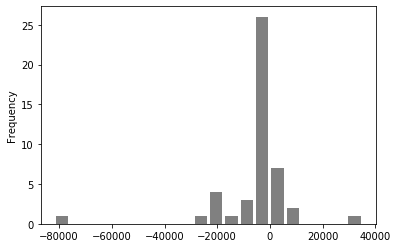

In [13]:
merged_data['from-to'].plot.hist(bins=20, color='grey', rwidth=.8)

### 2.  東京発着の物量の差の絶対値

In [14]:
merged_data['from-to'] = merged_data['from-to'].abs()

#### 2-1. 発着の物量の差が大きい上位10県
- 関東圏では顕著に 東京への物量 >> 東京からの物量
- 岡山と新潟はちょっと意外

In [15]:
merged_data.sort_values('from-to', ascending=False).head(10)

,from_vol,to_vol,from-to
神奈川,51681,133411,81730
山梨,38532,3565,34967
埼玉,135941,159705,23764
群馬,8490,29909,21419
栃木,11246,32339,21093
茨城,16467,36192,19725
千葉,34821,53694,18873
岡山,382,12311,11929
静岡,5736,16309,10573
新潟,2978,12887,9909


#### 2-1. 発着の物量の差が小さい上位10県
- 関東圏を離れると，トラックの物流の量は東京発も東京着もそんなに変わらない
- 熊本とか福岡って結構遠いのに物流量ほぼ同じだ

In [16]:
merged_data.sort_values('from-to').head(10)

,from_vol,to_vol,from-to
奈良,331,349,18
沖縄,21,0,21
熊本,1130,1170,40
佐賀,155,216,61
徳島,135,255,120
愛媛,687,826,139
秋田,612,825,213
福岡,2278,2064,214
鳥取,266,499,233
島根,111,371,260


#### 1-2. 差の絶対値の分布

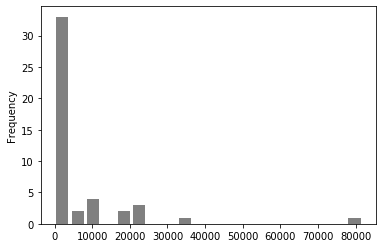

In [17]:
merged_data['from-to'].plot.hist(bins=20, color='grey', rwidth=.8)

### 3. 東京の物量 / 東京発の物量

In [18]:
merged_data['to/from'] = merged_data['to_vol'] / merged_data['from_vol']

#### 3-1. 東京の物量 / 東京発の物量が大きい上位10県
- 割合でみると，関東圏はすくなくなるな〜〜そもそもの物量が多いからな〜〜
- 岡山すごい物流の差だ

In [19]:
merged_data.sort_values('to/from', ascending=False).head(10)

,from_vol,to_vol,from-to,to/from
岡山,382,12311,11929,32.227749
山口,93,1617,1524,17.387097
福井,138,898,760,6.507246
大分,116,685,569,5.905172
宮崎,68,386,318,5.676471
新潟,2978,12887,9909,4.327401
岐阜,556,2402,1846,4.320144
香川,238,855,617,3.592437
群馬,8490,29909,21419,3.522850
長崎,132,454,322,3.439394


#### 3-2. 東京の物量 / 東京発の物量が小さい上位10県
- 割合でみるじゃなくてどれだけ1から離れてるかで見なきゃ意味ないな

In [20]:
merged_data.sort_values('to/from').head(10)

,from_vol,to_vol,from-to,to/from
沖縄,21,0,21,0.000000
山梨,38532,3565,34967,0.092521
広島,2553,554,1999,0.217000
宮城,11784,4379,7405,0.371606
大阪,19694,10779,8915,0.547324
高知,962,552,410,0.573805
三重,2520,1816,704,0.720635
福岡,2278,2064,214,0.906058
熊本,1130,1170,40,1.035398
奈良,331,349,18,1.054381


#### 3-3. 東京の物量 / 東京発の物量が小さい(0.4~1.6)県
- 関東圏はそんなに入ってこなくて，割と距離が遠い県との物流そんなに差がない
- とはいえ，1.5倍は十分大きい差とも言えるから，何ともいえないかな

In [21]:
merged_data[(merged_data['to/from']  > 0.4) & (merged_data['to/from']  < 1.6)]

,from_vol,to_vol,from-to,to/from
北海道,3319,4993,1674,1.504369
岩手,1578,1851,273,1.173004
秋田,612,825,213,1.348039
福島,5500,5848,348,1.063273
埼玉,135941,159705,23764,1.174811
千葉,34821,53694,18873,1.542001
石川,1015,1447,432,1.425616
長野,4047,6194,2147,1.530516
三重,2520,1816,704,0.720635
大阪,19694,10779,8915,0.547324


### 4. to/from - 1の絶対値


In [22]:
merged_data['to/from'] = (1 - (merged_data['to_vol'] / merged_data['from_vol'])).abs()

#### 4-1. 統計量
- 25％は0.6~1.4くらいの間に収まってる

In [23]:
merged_data['to/from'].describe()

count    46.000000
mean      2.335411
std       5.059317
min       0.035398
25%       0.432816
50%       0.898184
75%       2.113491
max      31.227749
Name: to/from, dtype: float64

#### 4-2. 0~3の分布

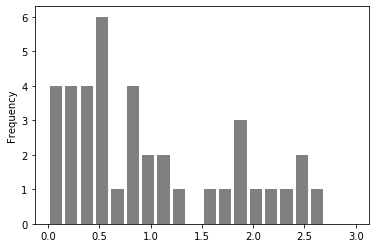

In [24]:
merged_data['to/from'].plot.hist(bins=20, color='grey', rwidth=.8, range=(0, 3))